## Problem set 3

**Problem 0** (-2 points for every missing green OK sign. If you don't run the cell below, that's -14 points.)

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.


/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] xgboost version 1.5.1 is installed.
[ OK ] shap version 0.40.0 is installed.


**Problem 1**

One of the datasets we will work with during the lecture is the kaggle house price dataset. The goal of this problem set is to practice dataframe manipulations with it and perform EDA.

Carefully read the description of the dataset which is located in the `data` folder. This is a very well documented dataset. Whenever you work with a dataset, it is highly recommended you prepare a similar discription if it is not readily available. Specific things to note:

- each feature is described in full detail,
- the meaning of continuous features is explained and their unit is provided (e.g., lot size is measured in square feet),
- each category in a categorical or ordinal feature is spelled out and explained.

**Problem 1a: Read in the data** (5 points)

The kaggle house price dataset is located in the `data` folder. 

First, read in the data into a pandas data frame. You might encounter error messages and other issues along the way. Please diagnose and resolve them. 


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('data/train.xlsx',sheet_name="data")
df.head(5)




,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Problem 1b: dataframe filtering**

Answer the following questions. Please make it easy for the TAs to grade your solution so print no more and no less than the necessary info. For example, if we ask how many columns there are in the dataset, print out that one number instead of the full shape of the data frame.

**Q1** When you buy a house, a surprising amount of time is spent assessing the basement. List the names of the basement-related features! How many basement-related features are there? (2 points)

In [3]:
bsmt_col=df.filter(like='Bsmt',axis=1).columns.tolist()
print(len(bsmt_col))


11


**Q2** How many houses have an excellent overall quality? (1 point)

In [4]:
print(len(df[df['OverallQual']==9]))


43


**Q3** How many houses have a pool and central airconditioning? (2 points)

In [5]:
print(len(df[(df['PoolQC']!='NA')& (df['CentralAir']=='Y')]))

1365


**Problem 2a: EDA** 

Answer the following questions. 

The sequence of questions here are typical things to ask when you perform EDA on a new dataset. First you always want to know how many data points and features you have, whether they are continuous or categorical, you should then take a closer look at the target variable. We will study the properties of the features and the relationships between the features and the target variable in 2b.

**Q1** How many rows and columns do we have in the dataframe? (2 point)

In [6]:
print(df.shape)

(1460, 80)



**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column. (2 points)

In [7]:

pd.options.display.max_rows = 1000
pd.options.display.width = 1000
df.dtypes.tolist

<bound method IndexOpsMixin.tolist of MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating     

**Q3** The ML target variable in this dataset is the sale price. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature. (2 points)

In [8]:
df['SalePrice'].describe
print("this is a continuous feature")


this is a continuous feature


**Q4** Visualize the target variable. Don't forget the axis labels and find appropriate arguments. (4 points)

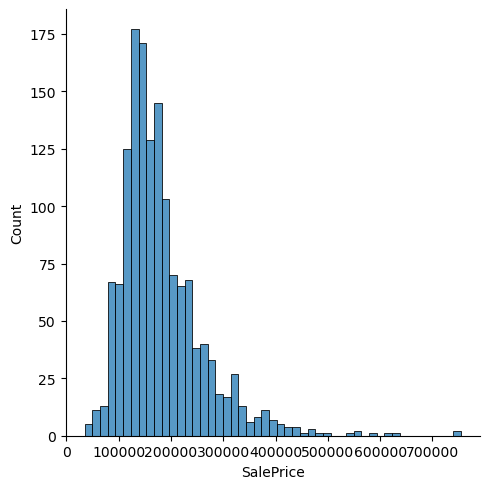

In [9]:
sns.displot(df, x="SalePrice")


**Problem 2b: visualization** (15 points)

Find one continuous, one ordinal, and one categorical feature that strongly correlates with the sale price. Create figures that illustrates your selected features and the sale price.

Don't forget to add axis labels and find apropriate arguments. Write figure captions and explain what the figure shows.

We will cover techniques in a week or two to quantitatively assess how strongly each feature correlates with the target variable. For now, we do a qualitative/visual assessment.

In [10]:
#Figure out best variables
corrMatrix = df.corr()
corrMatrix["SalePrice"].sort_values(ascending=False)
#ordinal: going to be overall quality (OverallQual)
#continuous: GrLivArea
#categorical: GarageCars

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [19]:
#graph for overall quality and price
df.plot.scatter(x = 'OverallQual', y = 'SalePrice',alpha=.2, title="Sale Price vs Real Estate's overall quality")


<AxesSubplot:title={'center':"Sale Price vs Real Estate's overall quality"}, xlabel='OverallQual', ylabel='SalePrice'>

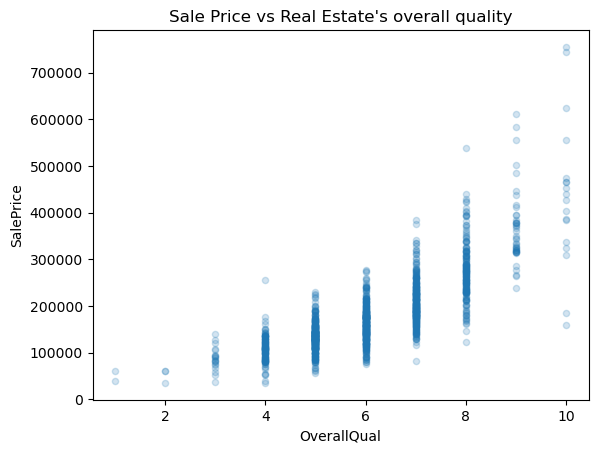

In [20]:
plt.show()

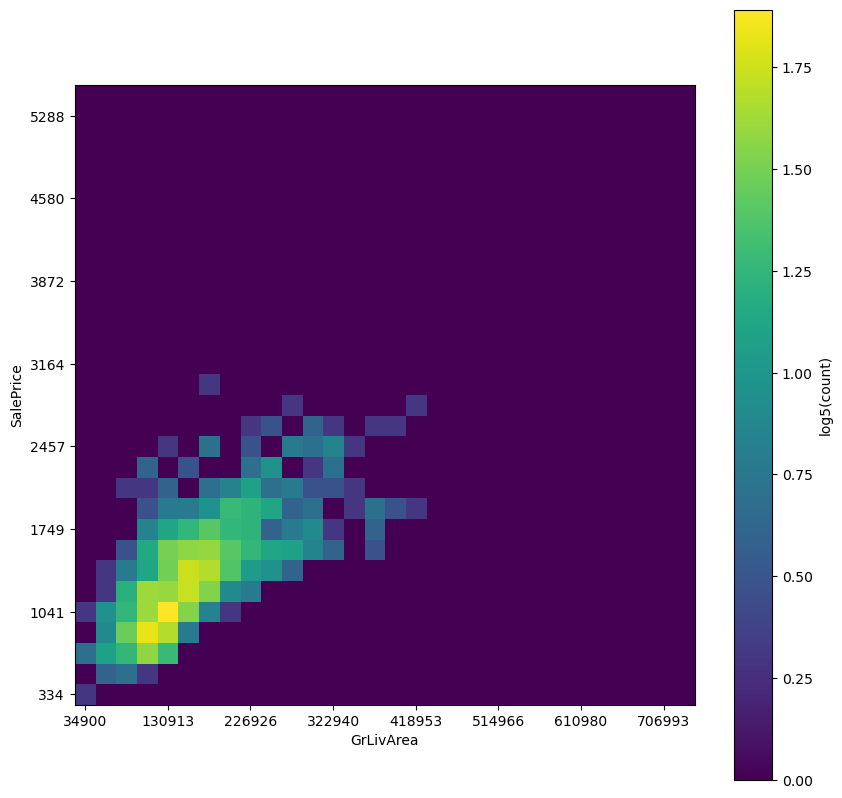

In [40]:
nbins = 30

heatmap, xedges, yedges = np.histogram2d(df['SalePrice'], df['GrLivArea'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#living area and sale price continuous vs continuous graph
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(10,10))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()


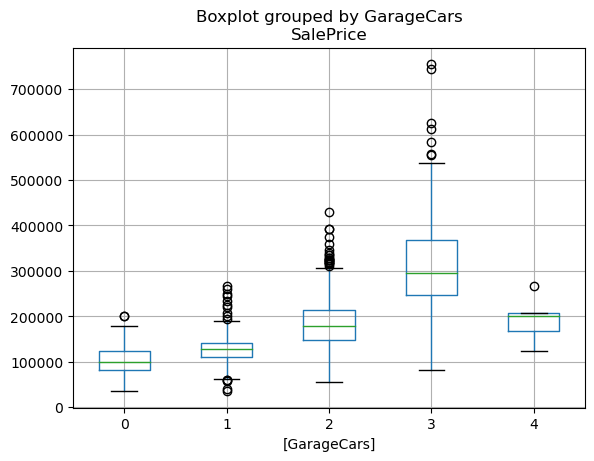

In [42]:
#price vs garage cars
df[['SalePrice','GarageCars']].boxplot(by='GarageCars')
plt.ylabel('SalePrice')
plt.show()